In [8]:
import os
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [9]:
os.getcwd()

'G:\\My Drive\\WGU\\WGU D212\\PA 1 - Clustering\\clustering'

In [10]:
medical_clean = pd.read_csv(filepath_or_buffer='G:\My Drive\WGU\WGU D212\PA 1 - Clustering\clustering\data\medical_clean.csv')
medical_clean

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [11]:
medical_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [12]:
# Identifying Readmissions Only: 
readmitted_patients = medical_clean[medical_clean['ReAdmis'] == 'Yes']
readmitted_index = readmitted_patients.index.tolist()
filtered_df = medical_clean.loc[readmitted_index]
filtered_df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
5000,5001,D267805,a9e22c9c-2d24-4f69-9ee4-6362288fce8b,e15f576fd4b6690975bb64ac81d06a36,Park Valley,UT,Box Elder,84329,41.76547,-113.41930,...,8333.857,28753.060,5,4,4,2,5,4,3,2
5001,5002,B876180,153dd8a9-2bdd-4417-b7a2-ae1413e86150,a51e6b88160818c9952012c48191fb0f,Kennett Square,PA,Chester,19348,39.86726,-75.71378,...,7331.058,14157.580,4,3,4,4,4,4,3,4
5005,5006,T641267,c1aa3666-c095-4399-93fa-640903254f4a,0ede016d4aa0f1a030d46b7e134f59a6,Thompson,UT,Grand,84540,39.24348,-109.43540,...,7285.025,5950.286,5,5,5,3,3,3,1,3
5006,5007,J290471,ce476031-7d34-433c-9e8d-d7973a8dbaf8,6919f4db7e6d7e985c6027ace418ce39,Everett,PA,Bedford,15537,40.00171,-78.36501,...,6997.381,10368.460,3,3,4,3,5,3,2,5
5008,5009,R849882,31a045bc-a57f-47a3-9f73-6d4d08472e0a,7b489f138bd8c6aa6163452ddfb1b32c,Stockton,IL,Jo Daviess,61085,42.34186,-90.03219,...,7780.328,9365.140,2,2,3,3,2,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,T523588,8dfe0df1-bf7b-48d0-83e9-0bc22d86d168,1a35db97b8b90ab318b90b708904d312,Columbus,OH,Franklin,43203,39.97310,-82.96898,...,7894.201,17367.970,3,3,4,2,4,3,3,4
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690,28507.150,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481,15281.210,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483,7781.678,5,5,3,4,4,3,4,3


In [13]:
categorical = filtered_df.select_dtypes(include='object')
numerical = filtered_df.select_dtypes(include=['int','float'])

In [14]:
categorical

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
5000,D267805,a9e22c9c-2d24-4f69-9ee4-6362288fce8b,e15f576fd4b6690975bb64ac81d06a36,Park Valley,UT,Box Elder,Rural,America/Denver,Chartered accountant,Never Married,...,No,No,No,Yes,No,No,No,No,No,Blood Work
5001,B876180,153dd8a9-2bdd-4417-b7a2-ae1413e86150,a51e6b88160818c9952012c48191fb0f,Kennett Square,PA,Chester,Suburban,America/New_York,Local government officer,Never Married,...,No,No,No,Yes,No,No,Yes,No,Yes,Blood Work
5005,T641267,c1aa3666-c095-4399-93fa-640903254f4a,0ede016d4aa0f1a030d46b7e134f59a6,Thompson,UT,Grand,Suburban,America/Denver,Market researcher,Separated,...,Yes,No,No,Yes,No,No,No,Yes,No,Blood Work
5006,J290471,ce476031-7d34-433c-9e8d-d7973a8dbaf8,6919f4db7e6d7e985c6027ace418ce39,Everett,PA,Bedford,Suburban,America/New_York,Retail manager,Married,...,Yes,No,No,Yes,Yes,No,No,No,No,CT Scan
5008,R849882,31a045bc-a57f-47a3-9f73-6d4d08472e0a,7b489f138bd8c6aa6163452ddfb1b32c,Stockton,IL,Jo Daviess,Rural,America/Chicago,"Psychotherapist, child",Divorced,...,No,Yes,No,No,No,No,Yes,Yes,No,Blood Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,T523588,8dfe0df1-bf7b-48d0-83e9-0bc22d86d168,1a35db97b8b90ab318b90b708904d312,Columbus,OH,Franklin,Rural,America/New_York,Training and development officer,Married,...,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Blood Work
9996,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,Urban,America/New_York,"Restaurant manager, fast food",Widowed,...,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan
9997,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,Rural,America/Chicago,"Psychologist, occupational",Separated,...,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous
9998,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,Rural,America/Denver,Outdoor activities/education manager,Divorced,...,Yes,No,No,No,Yes,No,No,No,No,Blood Work


In [15]:
drop = ['CaseOrder','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
numerical.drop(drop, axis=1, inplace=True)
numerical

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
5000,84329,41.76547,-113.41930,88,1,87,47689.17,19.53962,5,0,1,70.29151,8333.857,28753.060
5001,19348,39.86726,-75.71378,23537,1,87,100114.70,18.04371,4,0,1,64.93704,7331.058,14157.580
5005,84540,39.24348,-109.43540,146,1,32,58038.10,15.16530,4,0,1,59.33979,7285.025,5950.286
5006,15537,40.00171,-78.36501,7882,0,61,11346.70,18.00847,6,0,0,54.31234,6997.381,10368.460
5008,61085,42.34186,-90.03219,3629,1,28,18828.75,17.05505,6,4,0,68.58989,7780.328,9365.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,43203,39.97310,-82.96898,8368,3,50,21989.44,15.73466,3,2,0,56.61571,7894.201,17367.970
9996,8340,39.43609,-74.87302,1251,4,87,14983.02,18.17702,5,0,0,68.66824,7741.690,28507.150
9997,37171,36.36655,-87.29988,532,3,45,65917.81,17.12907,4,2,0,70.15418,8276.481,15281.210
9998,57775,44.10354,-102.01590,271,3,43,29702.32,19.91043,5,2,1,63.35690,7644.483,7781.678


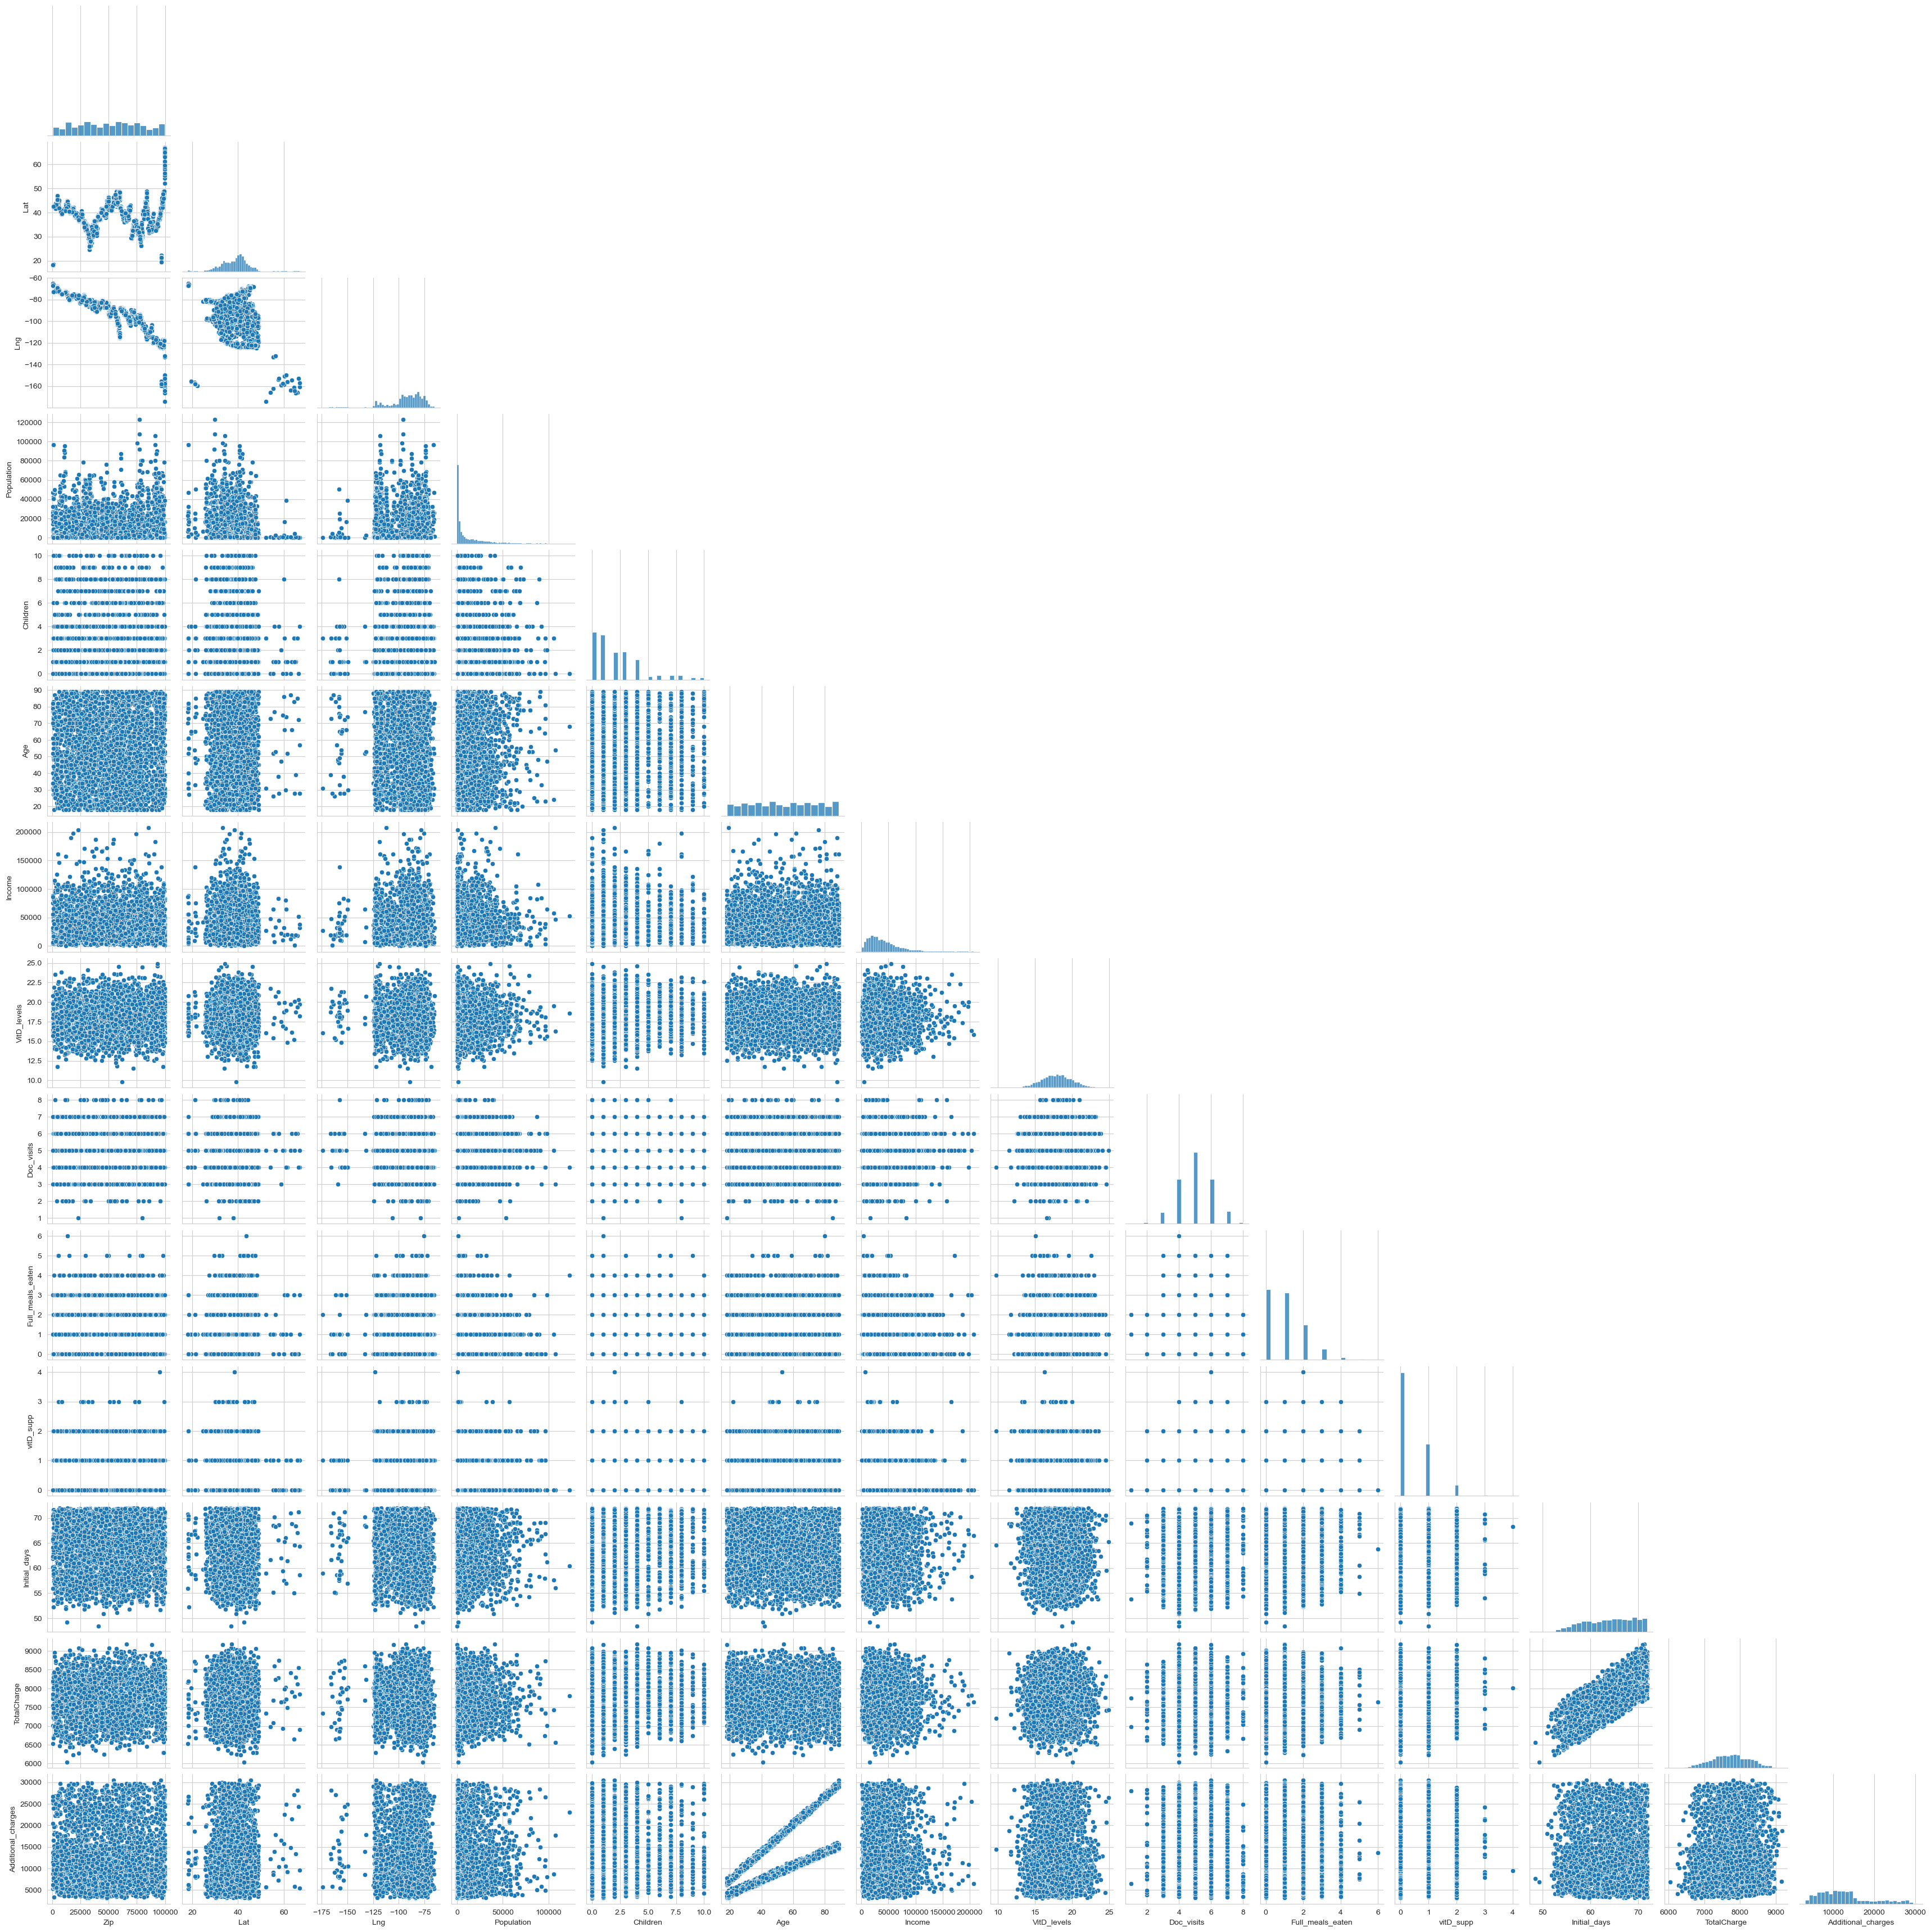

In [16]:
import seaborn as sns
sns.pairplot(numerical,corner=True)

In [17]:
selected = numerical[['Lat','Lng']].copy()
selected.describe()

,Lat,Lng
count,3669.000000,3669.000000
mean,38.649146,-91.267379
std,5.386415,15.038022
min,17.991740,-174.209700
25%,35.002860,-97.310780
50%,39.381190,-88.527690
75%,42.035240,-80.608100
max,66.978440,-65.290170


US Regions

In [18]:
from sklearn.cluster import KMeans
kmnorm = KMeans(n_clusters=3,random_state=10)
kmnorm.fit_predict(selected)
lat_lng_centers = kmnorm.cluster_centers_

In [19]:
lat_lng_centers

array([[  40.37069386, -120.33011171],
       [  38.26729135,  -94.32735245],
       [  38.45473223,  -79.10961322]])

In [20]:
def get_us_region(latit, lngit):
    if 37 <= latit <= 45 and -80 <= lngit <= -70:
        return "Northeast"
    elif 36 <= latit <= 49 and -105 <= lngit <= -80:
        return "Midwest"
    elif 25 <= latit <= 37 and -105 <= lngit <= -75:
        return "South"
    elif 32 <= latit <= 42 and -125 <= lngit <= -115:
        return "West"
    else:
        return "Other"

In [21]:
for i, (lat, lng) in enumerate(lat_lng_centers):
    region = get_us_region(lat, lng)
    print(f"Cluster Center {i + 1}: Latitude = {lat:.4f}, Longitude = {lng:.4f}, Region = {region}")

Cluster Center 1: Latitude = 40.3707, Longitude = -120.3301, Region = West
Cluster Center 2: Latitude = 38.2673, Longitude = -94.3274, Region = Midwest
Cluster Center 3: Latitude = 38.4547, Longitude = -79.1096, Region = Northeast


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

normalized = scaler.fit_transform(selected)
normalized_= pd.DataFrame(normalized, columns=selected.columns)
normalized_.head()

,Lat,Lng
0,0.578631,-1.473262
1,0.226176,1.034426
2,0.110354,-1.208304
3,0.251141,0.858100
4,0.685654,0.082149


In [23]:
normalized_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lat     3669 non-null   float64
 1   Lng     3669 non-null   float64
dtypes: float64(2)
memory usage: 57.5 KB


In [24]:
normalized_.describe().round(decimals=3)

,Lat,Lng
count,3669.000,3669.000
mean,-0.000,0.000
std,1.000,1.000
min,-3.836,-5.516
25%,-0.677,-0.402
50%,0.136,0.182
75%,0.629,0.709
max,5.260,1.728


In [25]:
normalized_.to_csv('normalized_selected_features_kmean.csv')

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=10)
km.fit(normalized_)

KMeans(n_clusters=3, random_state=10)

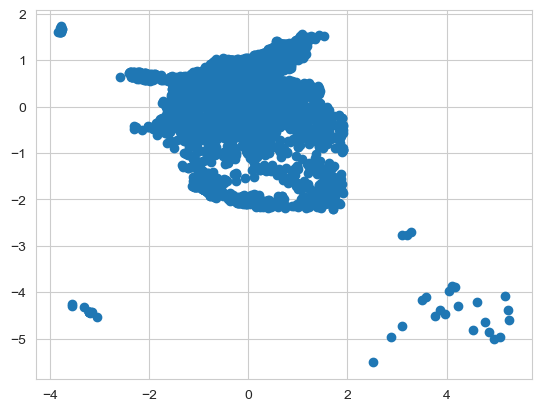

In [27]:
import matplotlib.pyplot as plt
plt.scatter(normalized_.iloc[:,0],normalized_.iloc[:,1])

In [28]:
centers = km.cluster_centers_
centers.round(decimals=3)
labels = km.labels_
print(centers)
print("Labels:", labels)

[[-1.08487017  0.1064063 ]
 [ 0.49204282  0.50274366]
 [ 0.39437242 -1.74002726]]
Labels: [2 1 2 ... 0 2 1]


In [29]:
ykm = km.predict(normalized_)

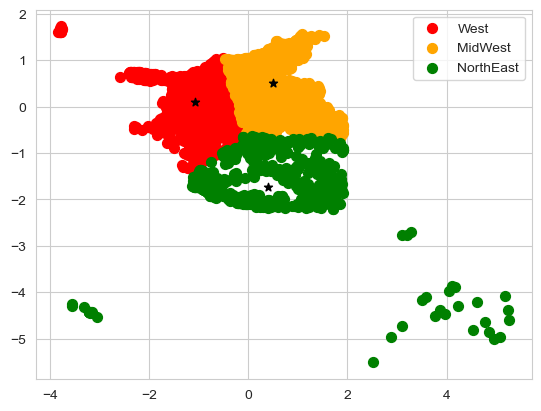

In [30]:
plt.scatter(normalized_.iloc[ykm == 0,0], normalized_.iloc[ykm == 0,1] ,s=50, color='red',label='West')
plt.scatter(normalized_.iloc[ykm == 1,0], normalized_.iloc[ykm == 1,1] ,s=50, color='orange',label='MidWest')
plt.scatter(normalized_.iloc[ykm == 2,0], normalized_.iloc[ykm == 2,1] ,s=50, color='green',label='NorthEast')

plt.scatter(centers[0][0],centers[0][1], marker='*', color='black')
plt.scatter(centers[1][0], centers[1][1], marker='*', color='black')
plt.scatter(centers[2][0], centers[2][1], marker='*', color='black')

plt.legend()

Assumptions

In [31]:
km.inertia_

3069.8475757866117

Within Cluster Sum of Squares (Elbow Method)

In [32]:
k_rng = range(2,10)
wcss = [] 

for k in k_rng:
    km = KMeans(n_clusters=k,random_state=10)
    km.fit(normalized_)
    wcss.append(km.inertia_)

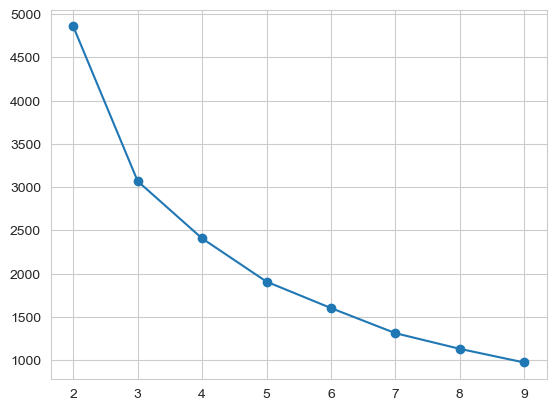

In [33]:
plt.plot(k_rng,wcss, marker='o')

Silhouette Analysis

In [34]:
from sklearn.metrics import silhouette_score
sil_rng = range(2,10)
silhouette_list = [] 

for k in sil_rng:
    km = KMeans(n_clusters=k,random_state=10)
    labels = km.fit_predict(normalized_)
    silhouette_list.append(silhouette_score(normalized_, labels))

In [35]:
silhouette_series = pd.Series(silhouette_list)
silhouette_series

0    0.416438
1    0.426815
2    0.436631
3    0.414979
4    0.416326
5    0.404188
6    0.410896
7    0.408840
dtype: float64

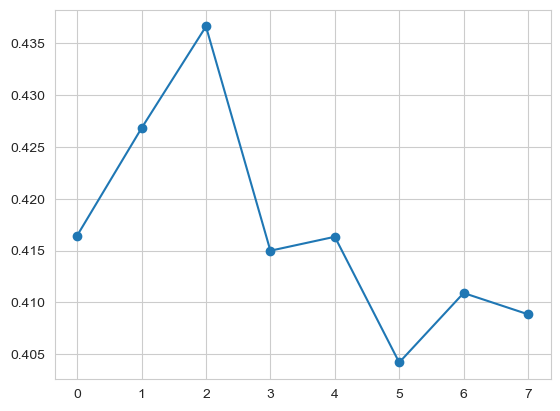

In [36]:
plt.plot(silhouette_series.index,silhouette_series, marker='o')